# Titanic Survival

# Data preprocessing

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [187]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
train = pd.read_csv('/content/drive/MyDrive/BS/train.csv')
test = pd.read_csv('/content/drive/MyDrive/BS/test.csv')

In [189]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [190]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [191]:
train.drop(columns=["Cabin"], inplace=True)
test.drop(columns=["Cabin"], inplace=True)

In [192]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [193]:
# Frist focus to fill the null values. Here Embarked have 2 null values.
# Therefore I will fill that null values by the maximum frequency value of embarked.

train['Embarked'].value_counts()


,count
Embarked,
S,644
C,168
Q,77


In [194]:
train['Embarked'].fillna('S', inplace=True)

<ipython-input-194-4f2a70d3b6f3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('S', inplace=True)


In [195]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [196]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,0


In [197]:
train_age = np.random.randint(train["Age"].mean()-train["Age"].std(), train["Age"].mean()+train["Age"].std(), 177)
print(train_age)

[31 19 15 31 29 36 25 24 41 30 30 24 40 34 29 35 30 15 26 27 43 18 17 37
 36 19 17 29 38 15 26 38 16 22 26 24 35 27 24 37 17 22 25 30 15 36 29 32
 16 28 33 37 40 30 43 32 37 18 34 20 20 43 42 25 28 16 23 19 20 19 35 33
 20 27 29 22 43 40 17 23 31 15 39 31 15 15 33 29 20 42 43 42 20 25 16 32
 32 20 29 41 42 22 25 31 19 21 24 20 33 22 28 42 28 37 26 40 22 31 32 20
 33 21 17 27 28 15 21 32 15 19 16 42 18 18 39 21 39 18 26 38 42 22 22 28
 15 34 17 43 31 23 35 34 36 29 30 38 18 32 17 31 42 33 39 26 16 26 42 37
 22 28 29 24 27 20 16 27 43]


In [198]:
test_age = np.random.randint(test["Age"].mean()-test["Age"].std(), test["Age"].mean()+test["Age"].std(), 86)
print(test_age)

[40 35 40 36 31 16 19 27 16 39 27 27 33 29 19 34 34 32 18 16 22 21 40 16
 38 43 26 43 40 19 30 43 32 38 29 31 25 32 24 26 36 16 39 37 22 35 35 34
 34 36 32 31 27 28 24 20 28 30 34 43 26 35 25 38 28 37 27 32 25 16 31 43
 29 38 31 29 20 35 18 17 41 17 25 26 19 42]


In [199]:
test["Fare"].fillna(test["Fare"].mean(), inplace=True)

<ipython-input-199-e192746a79f8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test["Fare"].fillna(test["Fare"].mean(), inplace=True)


In [200]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [201]:
train["Age"][train["Age"].isnull()] = train_age

<ipython-input-201-ccd5eddfbf02>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train["Age"][train["Age"].isnull()] = train_age
<ipython-input-201-ccd5eddfbf02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [202]:
train["Age"][train["Age"].isnull()]

,Age


In [203]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [204]:
test["Age"][test["Age"].isnull()] = test_age

<ipython-input-204-3c76d08b5eb2>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test["Age"][test["Age"].isnull()] = test_age
<ipython-input-204-3c76d08b5eb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [205]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [206]:
# EDA (The third steps of data analysis process)

train[train["Pclass"] == 1]["Survived"].value_counts()


,count
Survived,
1,136
0,80


In [207]:
train[train["Pclass"] == 2]["Survived"].value_counts()

,count
Survived,
0,97
1,87


In [208]:
train[train["Pclass"] == 3]["Survived"].value_counts()

,count
Survived,
0,372
1,119


In [209]:
train.groupby(train["Pclass"])["Survived"].mean() # The percentage of people of each Pclass they are survived.

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [210]:
train.groupby(train["Sex"])["Survived"].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [211]:
train.groupby(train["Embarked"])["Survived"].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


<ipython-input-212-2923b5f5d978>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Age"][train["Survived"]==0])
<ipython-input-212-2923b5f5d978>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Age"][train["Survived"]==1])


<Axes: xlabel='Age', ylabel='Density'>

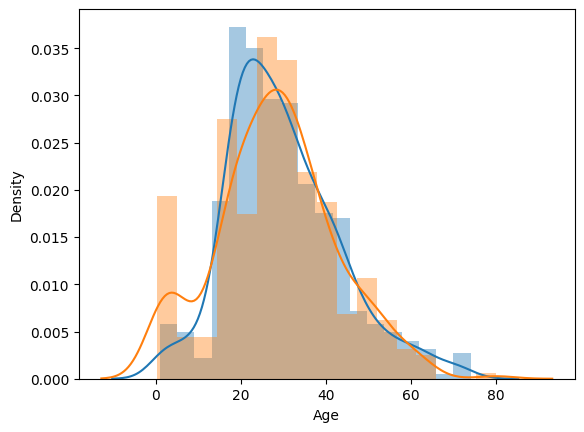

In [212]:
sns.distplot(train["Age"][train["Survived"]==0])
sns.distplot(train["Age"][train["Survived"]==1])

<ipython-input-213-da47d4c369e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Fare"][train["Survived"]==0])
<ipython-input-213-da47d4c369e4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Fare"][train["Survived"]==1])


<Axes: xlabel='Fare', ylabel='Density'>

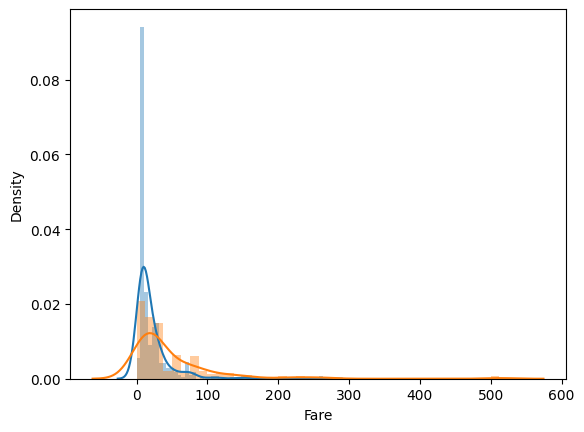

In [213]:
sns.distplot(train["Fare"][train["Survived"]==0])
sns.distplot(train["Fare"][train["Survived"]==1])

In [214]:
train.drop(columns=["Ticket"], inplace=True)
test.drop(columns=["Ticket"], inplace=True)

In [215]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [216]:
train["family"] = train["SibSp"] + train["Parch"] + 1

In [217]:
train["family"].value_counts()

,count
family,
1,537
2,161
3,102
4,29
6,22
5,15
7,12
11,7
8,6


In [218]:
test["family"] = test["SibSp"] + test["Parch"] + 1
test["family"].value_counts()

,count
family,
1,253
2,74
3,57
4,14
5,7
7,4
11,4
6,3
8,2


In [219]:
train.groupby(train["family"])["Survived"].mean()

,Survived
family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [220]:
def family_classifier(num):
    if num==1:
        return "Alone"
    elif num>1 and num<5:
        return "Medium"
    else:
        return "Large"

In [221]:
train["family_size"] = train["family"].apply(family_classifier)

In [222]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone


In [223]:
test["family_size"] = test["family"].apply(family_classifier)

In [224]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,Medium
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,Alone
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,Alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,Medium


In [225]:
train.drop(columns=["SibSp", "Parch", "family"], inplace=True)
test.drop(columns=["SibSp", "Parch", "family"], inplace=True)

In [226]:
train.shape

(891, 9)

In [227]:
test.shape

(418, 8)

In [228]:
passengerId = test["PassengerId"].values

In [229]:
train.drop(columns=["Name", "PassengerId"], inplace=True)
test.drop(columns=["Name", "PassengerId"], inplace=True)

In [230]:
train.head(4)

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,22.0,7.2500,S,Medium
1,1,1,female,38.0,71.2833,C,Medium
2,1,3,female,26.0,7.9250,S,Alone
3,1,1,female,35.0,53.1000,S,Medium


In [231]:
train = pd.get_dummies(train, columns=["Pclass", "Sex", "Embarked", "family_size"], drop_first=True)

In [232]:
train.shape

(891, 10)

In [233]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,family_size
0,3,male,34.5,7.8292,Q,Alone
1,3,female,47.0,7.0000,S,Medium
2,2,male,62.0,9.6875,Q,Alone
3,3,male,27.0,8.6625,S,Alone
4,3,female,22.0,12.2875,S,Medium


In [234]:
test = pd.get_dummies(test, columns=["Pclass", "Sex", "Embarked", "family_size"], drop_first=True)

In [235]:
test.shape

(418, 9)

In [236]:
test.head(3)

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,34.5,7.8292,False,True,True,True,False,False,False
1,47.0,7.0000,False,True,False,False,True,False,True
2,62.0,9.6875,True,False,True,True,False,False,False


In [237]:
train.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,0,22.0,7.2500,False,True,True,False,True,False,True
1,1,38.0,71.2833,False,False,False,False,False,False,True
2,1,26.0,7.9250,False,True,False,False,True,False,False
3,1,35.0,53.1000,False,False,False,False,True,False,True
4,0,35.0,8.0500,False,True,True,False,True,False,False


In [238]:
X = train.iloc[:, 1:]
y = train.iloc[:, 0]

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [243]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [251]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [252]:
y_pred = classifier.predict(X_test)

In [261]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1])

In [256]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7653631284916201

In [259]:
Xf = test.iloc[:,:].values

In [274]:
Xf.shape

(418, 9)

In [275]:
y_final = classifier.predict(Xf)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [276]:
y_final.shape

(418,)

In [277]:
passengerId.shape

(418,)

In [278]:
final = pd.DataFrame()

In [279]:
final

""


In [280]:
final["passengerId"] = passengerId
final["survived"] = y_final

In [281]:
final.head()

,passengerId,survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1


In [282]:
final.to_csv("submission.csv", index=False)